<a href="https://colab.research.google.com/github/fay421/ML_LinearRegression/blob/main/LapTop_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laptop Price Project

###This dataset provides comprehensive information on various laptops, capturing diverse features and specifications. It is a valuable resource for those interested in exploring and predicting laptop prices based on their characteristics.

###The dataset contains information about such as brand, name, price, specifications rating, processor details, RAM, storage (ROM), GPU, display size, resolution, operating system (OS), and warranty duration.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read Dataset

In [ ]:
df=pd.read_csv('laptop_price.csv')

## EDA : Exploratory Data Analysis

In [ ]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [ ]:
df.shape

(893, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [ ]:
# remove Unnamed columns
df = df.drop(['Unnamed: 0.1','Unnamed: 0','name'],axis=1)

In [ ]:
df.columns

Index(['brand', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [ ]:
df.duplicated().sum()

2

In [ ]:
df=df.drop_duplicates()

## Separate Categorical and Numerical Features

In [ ]:
from sklearn.compose import make_column_selector

In [ ]:
num=make_column_selector(dtype_include='number')(df)
cat=make_column_selector(dtype_exclude='number')(df)

In [ ]:
df_num=df[num]
df_cat=df[cat]

## Visualization of Categorical Columns

In [ ]:
df_cat

,brand,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,OS
0,HP,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,Windows 11 OS
1,HP,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,Windows 11 OS
2,Acer,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,Windows 11 OS
3,Lenovo,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,Windows 11 OS
4,Apple,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,Mac OS
...,...,...,...,...,...,...,...,...,...
888,Asus,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,Windows 11 OS
889,Asus,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,Windows 11 OS
890,Asus,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,Windows 11 OS
891,Asus,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,Windows 11 OS


<Axes: >

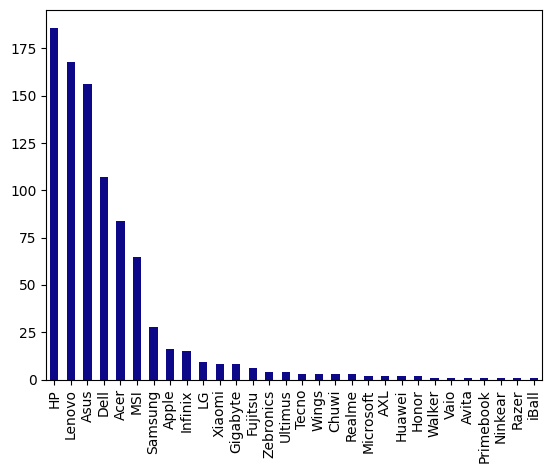

In [ ]:
Brand_val=df['brand'].value_counts()
Brand_val.plot(kind='bar',colormap='plasma')

In [ ]:
def countplot(column_name):
  sns.countplot(data=df, x=column_name)
  plt.title(column_name +  'Count Plot')
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.xticks(rotation = 90)
  plt.show()

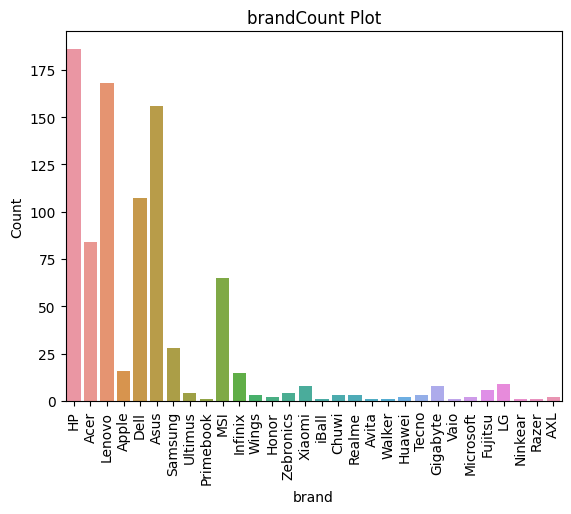

In [ ]:
countplot('brand')

In [ ]:
df['brand'].unique()

array(['HP', 'Acer', 'Lenovo', 'Apple', 'Dell', 'Asus', 'Samsung',
       'Ultimus', 'Primebook', 'MSI', 'Infinix', 'Wings', 'Honor',
       'Zebronics', 'Xiaomi', 'iBall', 'Chuwi', 'Realme', 'Avita',
       'Walker', 'Huawei', 'Tecno', 'Gigabyte', 'Vaio', 'Microsoft',
       'Fujitsu', 'LG', 'Ninkear', 'Razer', 'AXL'], dtype=object)

In [ ]:
df['brand'].value_counts().sort_values(ascending=False).head(5)

HP        186
Lenovo    168
Asus      156
Dell      107
Acer       84
Name: brand, dtype: int64

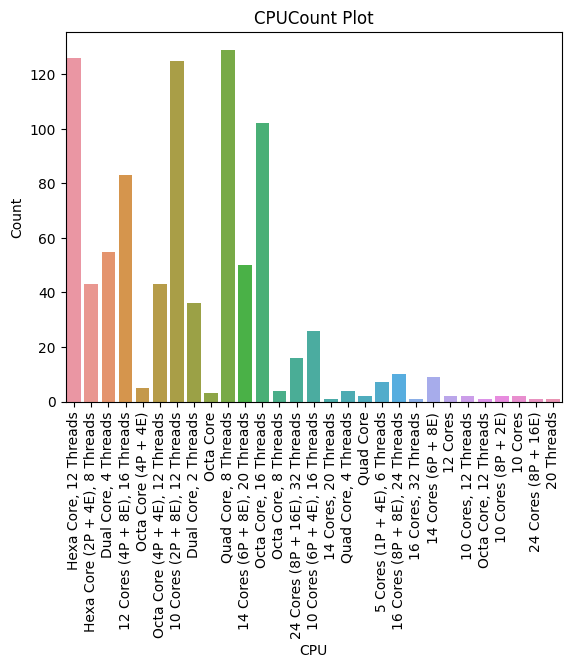

In [ ]:
countplot('CPU')

In [ ]:
df['CPU'].unique()

array(['Hexa Core, 12 Threads', 'Hexa Core (2P + 4E), 8 Threads',
       'Dual Core, 4 Threads', '12 Cores (4P + 8E), 16 Threads',
       'Octa Core (4P + 4E)', 'Octa Core (4P + 4E), 12 Threads',
       '10 Cores (2P + 8E), 12 Threads', 'Dual Core, 2 Threads',
       'Octa Core', 'Quad Core, 8 Threads',
       '14 Cores (6P + 8E), 20 Threads', 'Octa Core, 16 Threads',
       'Octa Core, 8 Threads', '24 Cores (8P + 16E), 32 Threads',
       '10 Cores (6P + 4E), 16 Threads', '14 Cores, 20 Threads',
       'Quad Core, 4 Threads', 'Quad Core',
       '5 Cores (1P + 4E), 6 Threads', '16 Cores (8P + 8E), 24 Threads',
       '16 Cores, 32 Threads', '14 Cores (6P + 8E)', '12 Cores',
       '10 Cores, 12 Threads', 'Octa Core, 12 Threads',
       '10 Cores (8P + 2E)', '10 Cores', '24 Cores (8P + 16E)',
       '20 Threads'], dtype=object)

In [ ]:
df['CPU'].value_counts().sort_values(ascending=False).head(5)

Quad Core, 8 Threads              129
Hexa Core, 12 Threads             126
10 Cores (2P + 8E), 12 Threads    125
Octa Core, 16 Threads             102
12 Cores (4P + 8E), 16 Threads     83
Name: CPU, dtype: int64

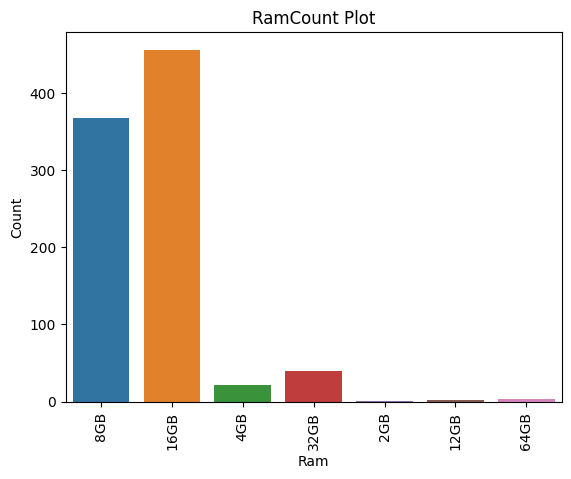

In [ ]:
countplot('Ram')

In [ ]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '32GB', '2GB', '12GB', '64GB'], dtype=object)

In [ ]:
df['Ram'].value_counts().sort_values(ascending=False)

16GB    456
8GB     367
32GB     40
4GB      22
64GB      3
12GB      2
2GB       1
Name: Ram, dtype: int64

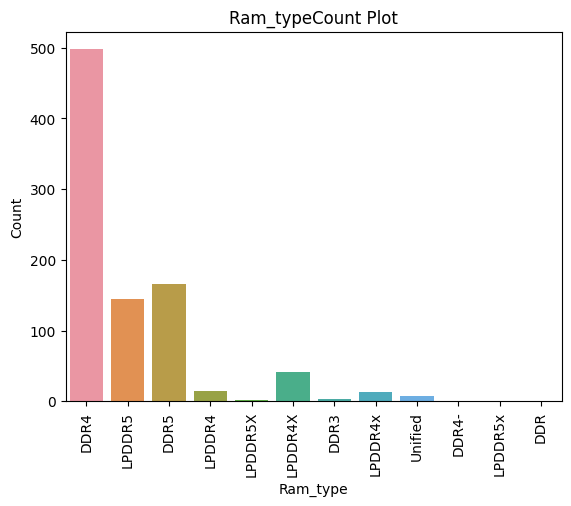

In [ ]:
countplot('Ram_type')

In [ ]:
df['Ram_type'].unique()

array(['DDR4', 'LPDDR5', 'DDR5', 'LPDDR4', 'LPDDR5X', 'LPDDR4X', 'DDR3',
       'LPDDR4x', 'Unified', 'DDR4-', 'LPDDR5x', 'DDR'], dtype=object)

In [ ]:
df['Ram_type'].value_counts().sort_values(ascending=False).head(5)

DDR4       498
DDR5       166
LPDDR5     144
LPDDR4X     41
LPDDR4      14
Name: Ram_type, dtype: int64

In [ ]:
df['ROM_type'].unique()

array(['SSD', 'Hard-Disk'], dtype=object)

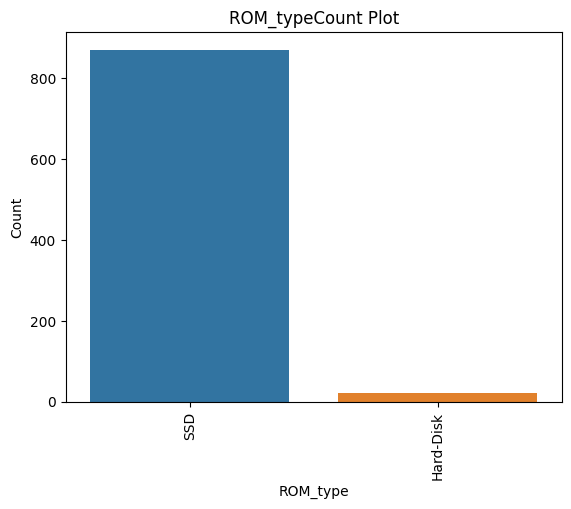

In [ ]:
countplot('ROM_type')

In [ ]:
df['ROM_type'].value_counts()

SSD          870
Hard-Disk     21
Name: ROM_type, dtype: int64

In [ ]:
df['GPU'].unique()

array(['4GB AMD Radeon RX 6500M', 'Intel UHD Graphics',
       'Intel Iris Xe Graphics', 'Intel Integrated Iris Xe',
       'Apple M1 Integrated Graphics', '6GB NVIDIA GeForce RTX 4050',
       'Intel Iris Xe', 'Intel Integrated UHD',
       'Intel Integrated UHD Graphics', '4GB NVIDIA GeForce RTX 3050',
       'ARM Mali G72', 'AMD Radeon Graphics',
       '4GB NVIDIA GeForce RTX 2050', '4GB NVIDIA GeForce GTX 1650',
       'AMD Radeon Vega 7', '8-Core GPU', 'AMD Radeon AMD',
       'AMD Integrated', '8GB NVIDIA GeForce RTX 4070',
       '4GB AMD Radeon RX 6500M Graphics', 'AMD Graphics',
       '8GB NVIDIA GeForce RTX 3070 Ti', 'Intel Integrated Integrated',
       'Intel Graphics', '6GB NVIDIA GeForce RTX 3050',
       'Intel UHD Graphics ', '16GB NVIDIA GeForce RTX 4090',
       'AMD Radeon Radeon Graphics', '8GB NVIDIA GeForce RTX 4060',
       'Intel Integrated Intel UHD Graphics',
       '4GB NVIDIA GeForce RTX 3050 Ti', 'Intel Integrated Intel UHD',
       '4GB NVIDIA GeForce GT

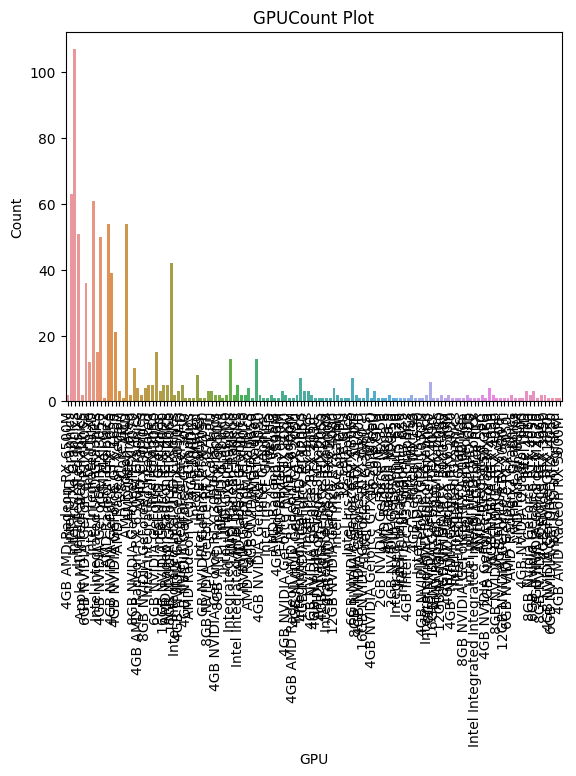

In [ ]:
countplot('GPU')

In [ ]:
df['GPU'].value_counts().sort_values(ascending=False).head(5)

Intel Iris Xe Graphics    107
Intel UHD Graphics         63
Intel Integrated UHD       61
AMD Radeon AMD             54
AMD Radeon Graphics        54
Name: GPU, dtype: int64

In [ ]:
df['OS'].unique()

array(['Windows 11 OS', 'Mac OS', 'Android 11 OS', 'DOS OS',
       'Windows 10 OS', 'Windows 10  OS', 'Chrome OS', 'Windows OS',
       'Ubuntu OS', 'Mac Catalina OS', 'DOS 3.0 OS', 'Windows 11  OS',
       'Mac High Sierra OS', 'Mac 10.15.3\t OS'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


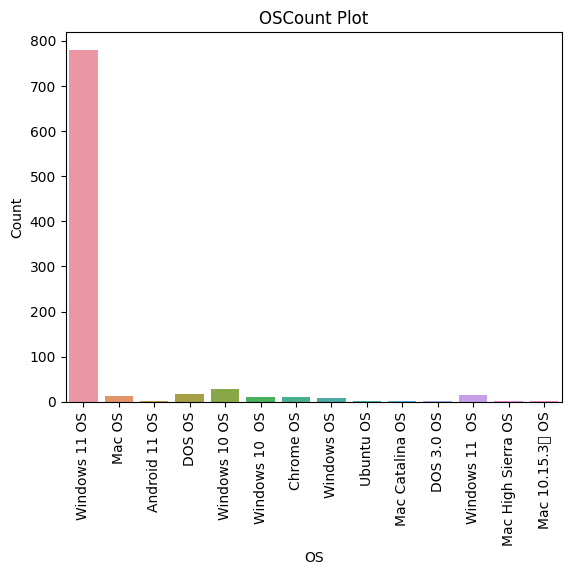

In [ ]:
countplot('OS')

In [ ]:
df['OS'].value_counts().sort_values(ascending=False).head(5)

Windows 11 OS     780
Windows 10 OS      28
DOS OS             18
Windows 11  OS     15
Mac OS             12
Name: OS, dtype: int64

## Visualization of Numerical Columns

In [ ]:
df_num

,price,spec_rating,display_size,resolution_width,resolution_height,warranty
0,49900,73.000000,15.6,1920.0,1080.0,1
1,39900,60.000000,15.6,1920.0,1080.0,1
2,26990,69.323529,14.0,1920.0,1080.0,1
3,59729,66.000000,14.0,2240.0,1400.0,1
4,69990,69.323529,13.3,2560.0,1600.0,1
...,...,...,...,...,...,...
888,44990,69.323529,15.6,1920.0,1080.0,1
889,110000,71.000000,15.6,2560.0,1440.0,1
890,189990,89.000000,14.0,2560.0,1600.0,1
891,129990,73.000000,15.6,1920.0,1080.0,1


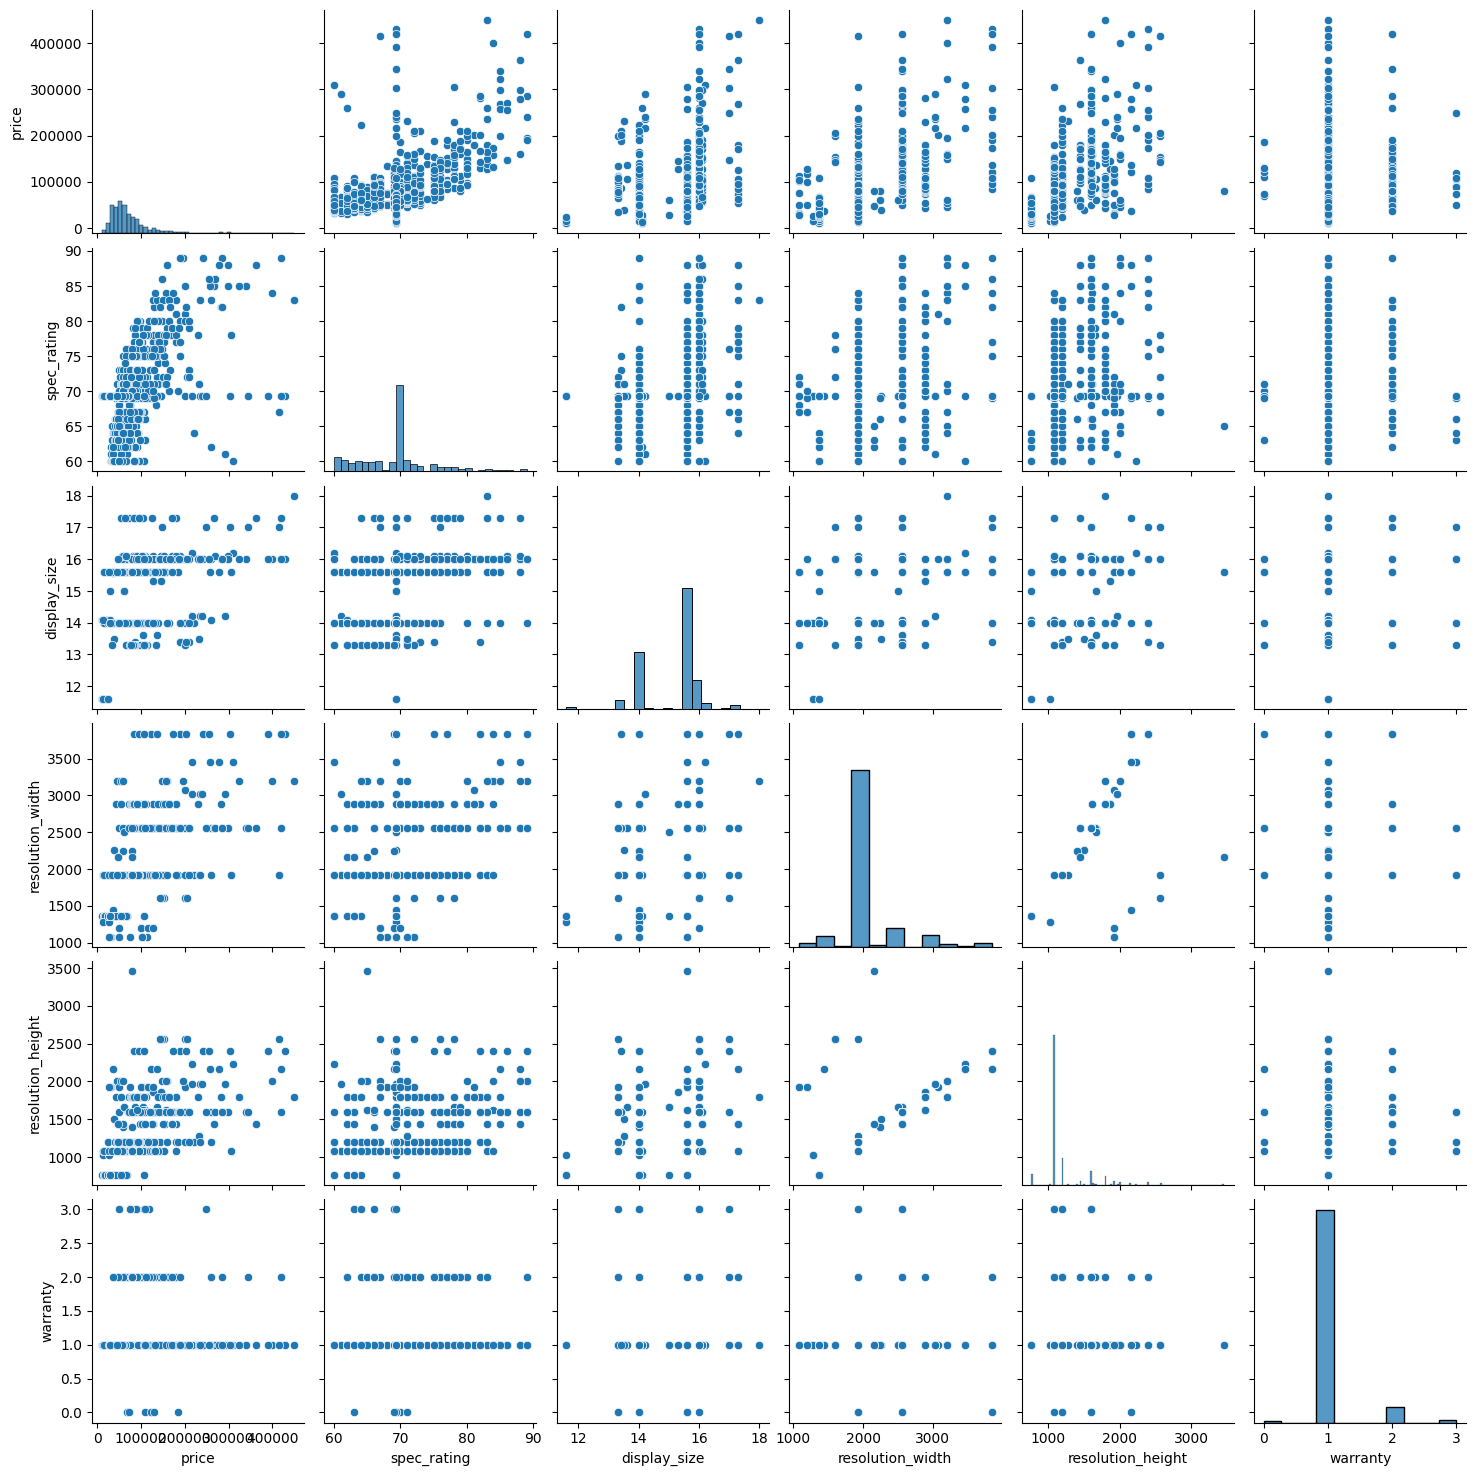

In [ ]:
sns.pairplot(data=df_num);

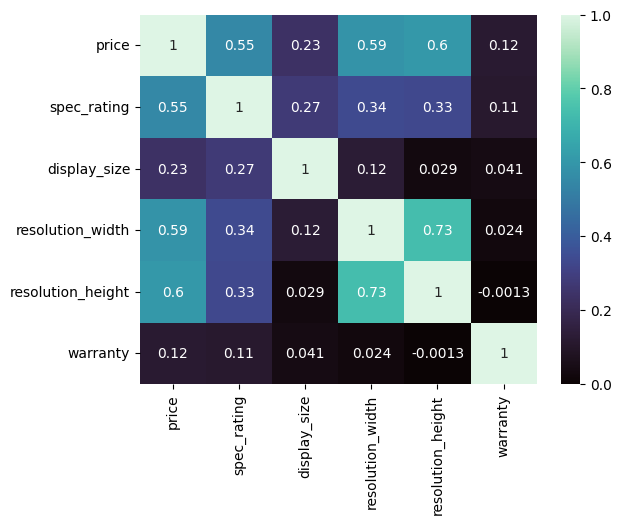

In [ ]:
sns.heatmap(data=df_num.corr(), annot=True, cmap = 'mako');

In [ ]:
num_corr=df_num.corr()

In [ ]:
print(num_corr['price'].sort_values(ascending=False))

price                1.000000
resolution_height    0.604538
resolution_width     0.586005
spec_rating          0.546724
display_size         0.233521
warranty             0.116771
Name: price, dtype: float64


## We can remove DISPLAY_SIZE AND WARRANTY because they do not correlate well with PRICE.

In [ ]:
df_num=df_num.drop(['warranty','display_size'],axis=1)

In [ ]:
# price information

df_num['price'].describe()

count       891.000000
mean      80010.479237
std       60909.441363
min        9999.000000
25%       44835.000000
50%       61990.000000
75%       90990.000000
max      450039.000000
Name: price, dtype: float64



*   Avg price: 80010
*   Max price: 450039
*   Min price: 9999




## Train Test Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_num.drop('price',axis =1)
y = df_num['price']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42,test_size=0.3)

## Model : Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR=LinearRegression()

In [ ]:
# fit train data
LR.fit(X_train,y_train)

LinearRegression()

### print out coefficients and interception

In [ ]:
print('Coefficients: \n ' , LR.coef_)
print('Intercept: \n' , LR.intercept_)

Coefficients: 
  [3984.3412027    27.35181462   62.49123603]
Intercept: 
 -329093.25787804526


In [ ]:
# prediction
y_pred = LR.predict(X_test)

###  Create a scatterplot of the real test values versus the predicted values


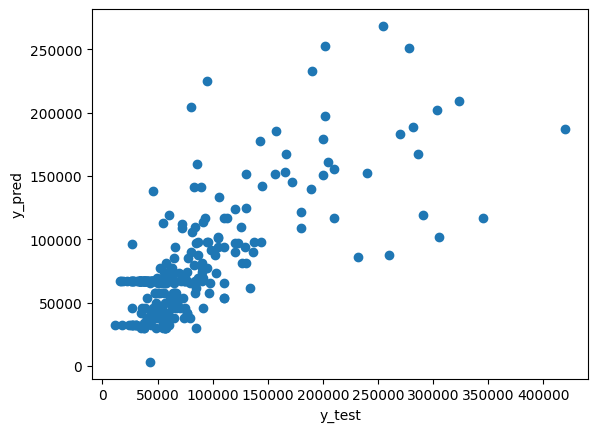

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred');

## Evaluating the Model

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 28682.787647415906
MSE: 1938096698.4599204
RMSE: 44023.81967139972


In [ ]:
R2=r2_score(y_test, y_pred)
print('R2_Score: \n',R2)

R2_Score: 
 0.5322005172275401


## Recreate the dataframe below.

In [ ]:
coeffecients = pd.DataFrame(LR.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
spec_rating,3984.341203
resolution_width,27.351815
resolution_height,62.491236
